# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
data=pd.read_csv('https://raw.githubusercontent.com/ta-data-par/DAFT_NOV_21_01/main/module_3/9.%20Unsupervised-Learning/data/Wholesale%20customers%20data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
#What does each column mean?
data.describe().T

count          mean           std  ...     50%       75%       max
Channel           440.0      1.322727      0.468052  ...     1.0      2.00       2.0
Region            440.0      2.543182      0.774272  ...     3.0      3.00       3.0
Fresh             440.0  12000.297727  12647.328865  ...  8504.0  16933.75  112151.0
Milk              440.0   5796.265909   7380.377175  ...  3627.0   7190.25   73498.0
Grocery           440.0   7951.277273   9503.162829  ...  4755.5  10655.75   92780.0
Frozen            440.0   3071.931818   4854.673333  ...  1526.0   3554.25   60869.0
Detergents_Paper  440.0   2881.493182   4767.854448  ...   816.5   3922.00   40827.0
Delicassen        440.0   1524.870455   2820.105937  ...   965.5   1820.25   47943.0

[8 rows x 8 columns]

In [4]:
#Any categorical data to convert?
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
# Any missing data to remove?
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

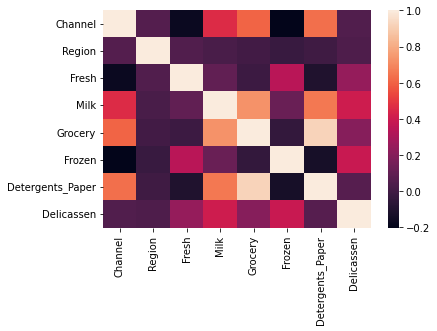

In [6]:
# Column collinearity - any high correlations?
#data.corr()
sns.heatmap(data.corr())

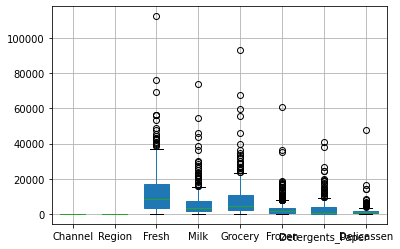

In [7]:
# # Descriptive statistics - any outliers to remove?
import matplotlib.pyplot as plt
figsize=(20, 10)
data.boxplot(widths = 0.6, patch_artist = True)

In [8]:
# Descriptive statistics - any outliers to remove?
q1, q3= np.percentile(data,[25,75])
q1,q3

(3.0, 4768.0)

In [9]:
iqr = q3 - q1

In [10]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [11]:
print(lower_bound)
print(upper_bound)


-7144.5
11915.5


In [12]:
# Column-wise data distribution - is the distribution skewed?
skewness = data.skew()
skewness

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [13]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f947a937510>,
      dtype=object)

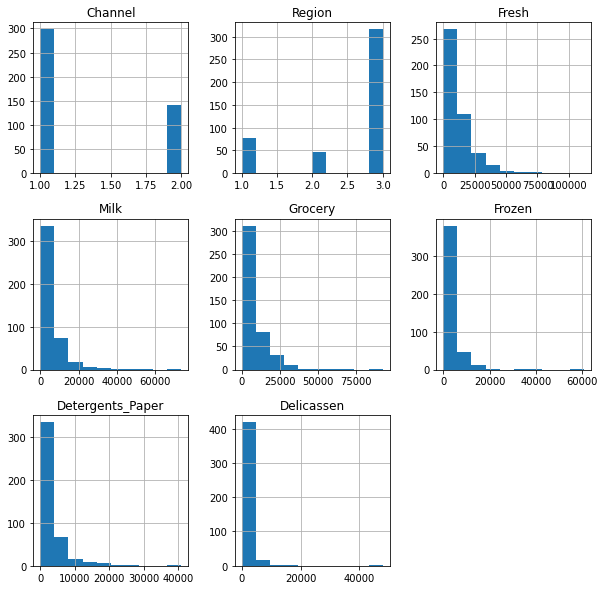

In [14]:
data.hist(figsize=(10,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

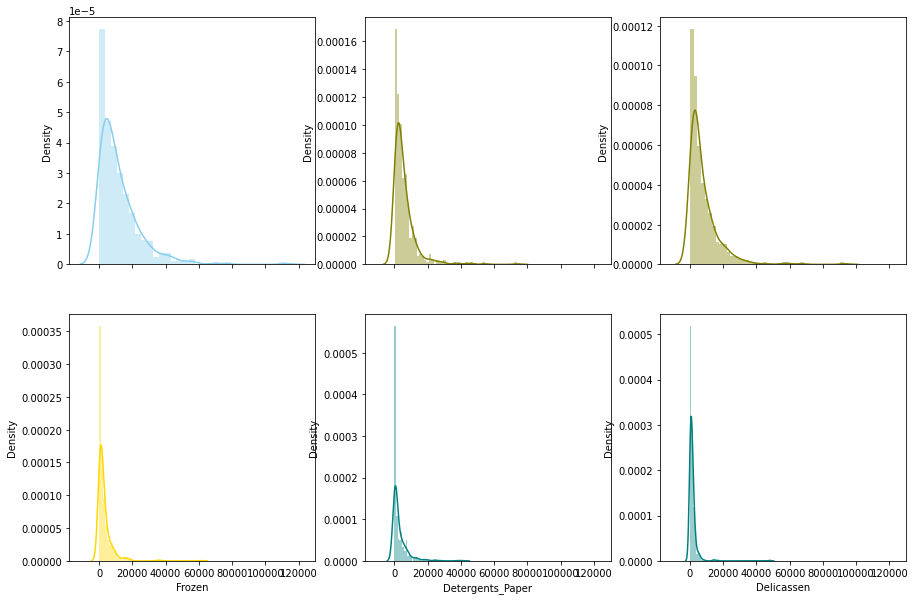

In [18]:
# plot
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True)
sns.distplot( data["Fresh"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["Milk"] , color="olive", ax=axes[0, 1])
sns.distplot( data["Grocery"] , color="olive", ax=axes[0, 2])
sns.distplot( data["Frozen"] , color="gold", ax=axes[1, 0])
sns.distplot( data["Detergents_Paper"] , color="teal", ax=axes[1, 1])
sns.distplot( data["Delicassen"] , color="teal", ax=axes[1, 2])

In [15]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [16]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [17]:
  # Your observations here

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [19]:
# Your comment here
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

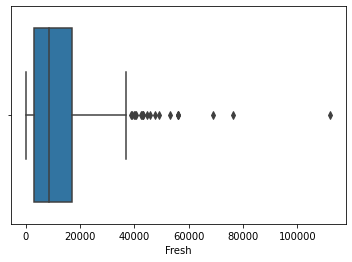

In [20]:
sns.boxplot(x=data['Fresh'])

In [21]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Channel                 1.00
Region                  1.00
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicassen           1412.00
dtype: float64


In [22]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
from scipy import stats
z = np.abs(stats.zscore(data))
data = data[(z < 3).all(axis=1)]

In [24]:
data

Channel  Region  Fresh  ...  Frozen  Detergents_Paper  Delicassen
0          2       3  12669  ...     214              2674        1338
1          2       3   7057  ...    1762              3293        1776
3          1       3  13265  ...    6404               507        1788
5          2       3   9413  ...     666              1795        1451
6          2       3  12126  ...     480              3140         545
..       ...     ...    ...  ...     ...               ...         ...
432        1       3  21117  ...     269              1328         395
433        1       3   1982  ...    1541               356        1449
434        1       3  16731  ...     688              2371         838
438        1       3  10290  ...    1038               168        2125
439        1       3   2787  ...      65               477          52

[316 rows x 8 columns]

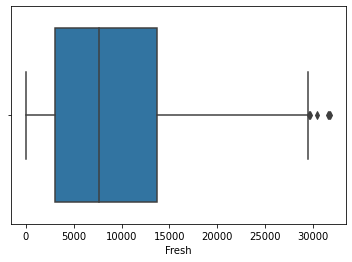

In [26]:
sns.boxplot(x=data['Fresh'])

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [27]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

standardscaler = StandardScaler().fit(data)
customers_scale = standardscaler.transform(data)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
kmeans = KMeans()
customers_kmeans = kmeans.fit(customers_scale)

In [30]:
data['labels']=customers_kmeans.labels_
data.labels.value_counts()

1    86
2    44
0    39
5    37
7    35
4    30
3    23
6    22
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [31]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)
customers_dbscan = dbscan.fit(customers_scale)
data['labels_DBSCAN'] = customers_dbscan.labels_

data.head()

Channel  Region  Fresh  ...  Delicassen  labels  labels_DBSCAN
0        2       3  12669  ...        1338       4             -1
1        2       3   7057  ...        1776       4             -1
3        1       3  13265  ...        1788       5             -1
5        2       3   9413  ...        1451       4             -1
6        2       3  12126  ...         545       6             -1

[5 rows x 10 columns]

Count the values in `labels_DBSCAN`.

In [32]:
# Your code here
data.labels_DBSCAN.value_counts()

-1    297
 1     12
 0      7
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

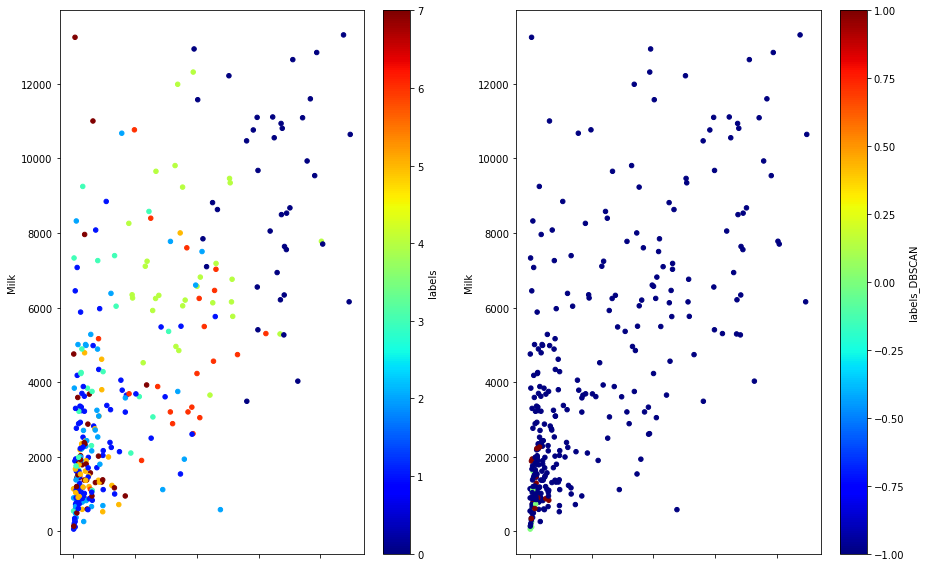

In [33]:
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels',colormap='jet',ax=axes[0])
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels_DBSCAN',colormap='jet',ax=axes[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f947312a150>],
      dtype=object)

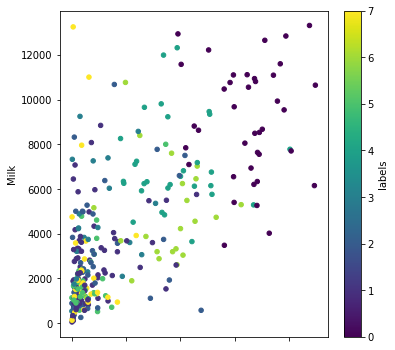

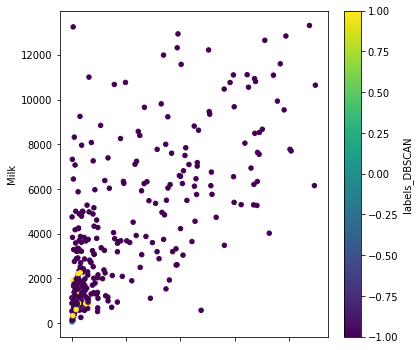

In [34]:
# Your code here:
#with k-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Detergents_Paper", y="Milk", c="labels", colormap="viridis")
#with dbscan-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Detergents_Paper", y="Milk", c="labels_DBSCAN", colormap="viridis")

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

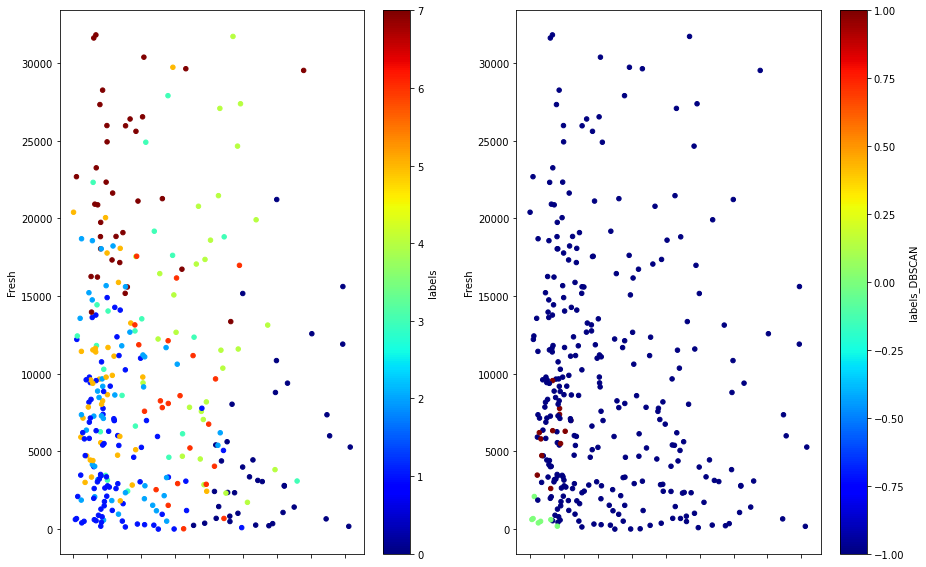

In [36]:
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
data.plot.scatter(x='Grocery',y='Fresh',c='labels',colormap='jet',ax=axes[0])
data.plot.scatter(x='Grocery',y='Fresh',c='labels_DBSCAN',colormap='jet',ax=axes[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9472cfbc10>],
      dtype=object)

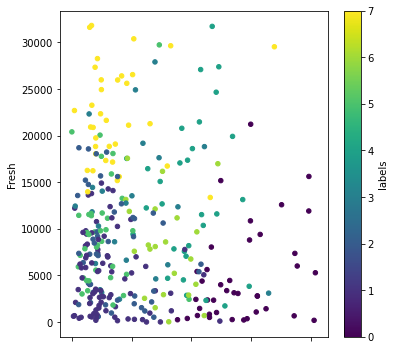

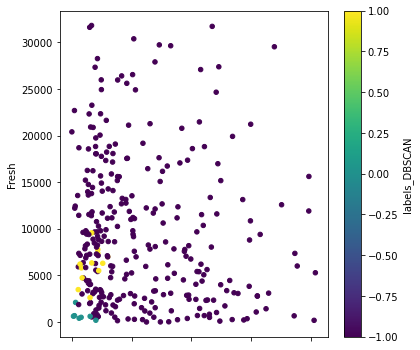

In [37]:
# Your code here:
#with k-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Grocery", y="Fresh", c="labels", colormap="viridis")
#with dbscan-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Grocery", y="Fresh", c="labels_DBSCAN", colormap="viridis")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

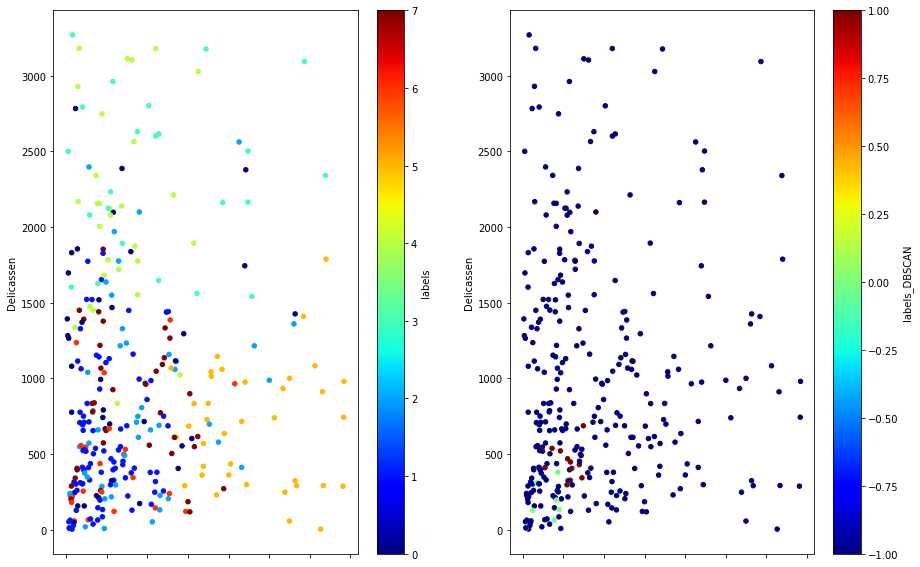

In [38]:
f, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)
data.plot.scatter(x='Frozen',y='Delicassen',c='labels',colormap='jet',ax=axes[0])
data.plot.scatter(x='Frozen',y='Delicassen',c='labels_DBSCAN',colormap='jet',ax=axes[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9472a05c50>],
      dtype=object)

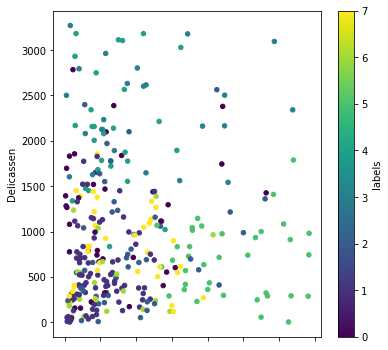

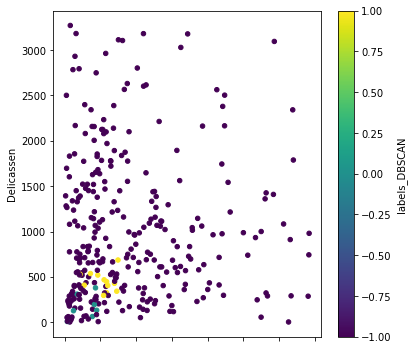

In [39]:
# Your code here:
#with k-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Frozen", y="Delicassen", c="labels", colormap="viridis")
#with dbscan-means
data.plot.scatter(subplots=True, figsize=(6, 6), x="Frozen", y="Delicassen", c="labels_DBSCAN", colormap="viridis")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [40]:
# Your code here:
data.groupby("labels").mean()

Channel    Region  ...   Delicassen  labels_DBSCAN
labels                      ...                            
0       1.923077  2.615385  ...  1077.948718      -1.000000
1       1.000000  2.953488  ...   584.732558      -0.639535
2       1.022727  1.113636  ...   846.772727      -1.000000
3       1.000000  2.956522  ...  2344.956522      -1.000000
4       1.966667  2.866667  ...  2114.200000      -1.000000
5       1.000000  2.648649  ...   686.054054      -1.000000
6       2.000000  2.727273  ...   457.545455      -1.000000
7       1.000000  2.514286  ...   805.657143      -1.000000

[8 rows x 9 columns]

In [41]:

data.groupby("labels_DBSCAN").mean()

Channel    Region  ...   Delicassen    labels
labels_DBSCAN                      ...                       
-1             1.296296  2.518519  ...  1023.518519  3.050505
 0             1.000000  3.000000  ...   173.428571  1.000000
 1             1.000000  3.000000  ...   449.500000  1.000000

[3 rows x 9 columns]

Which algorithm appears to perform better?

In [42]:
# Your observations here
#Observing the dispersion of the points in the graphs, the DBSCAN algorithm performs better.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [44]:
for i in range(2,8):
    cluster = KMeans(n_clusters=i)
    model = cluster.fit(customers_scale)
    data['labels'+ str(i)]=model.labels_  

In [45]:
data

Channel  Region  Fresh  Milk  ...  labels4  labels5  labels6  labels7
0          2       3  12669  9656  ...        2        4        2        1
1          2       3   7057  9810  ...        2        4        2        1
3          1       3  13265  1196  ...        1        2        1        5
5          2       3   9413  8259  ...        2        3        2        1
6          2       3  12126  3199  ...        2        4        2        1
..       ...     ...    ...   ...  ...      ...      ...      ...      ...
432        1       3  21117  1162  ...        0        1        0        3
433        1       3   1982  3218  ...        0        1        5        0
434        1       3  16731  3922  ...        0        1        0        3
438        1       3  10290  1981  ...        1        1        0        0
439        1       3   2787  1698  ...        0        1        5        0

[316 rows x 16 columns]

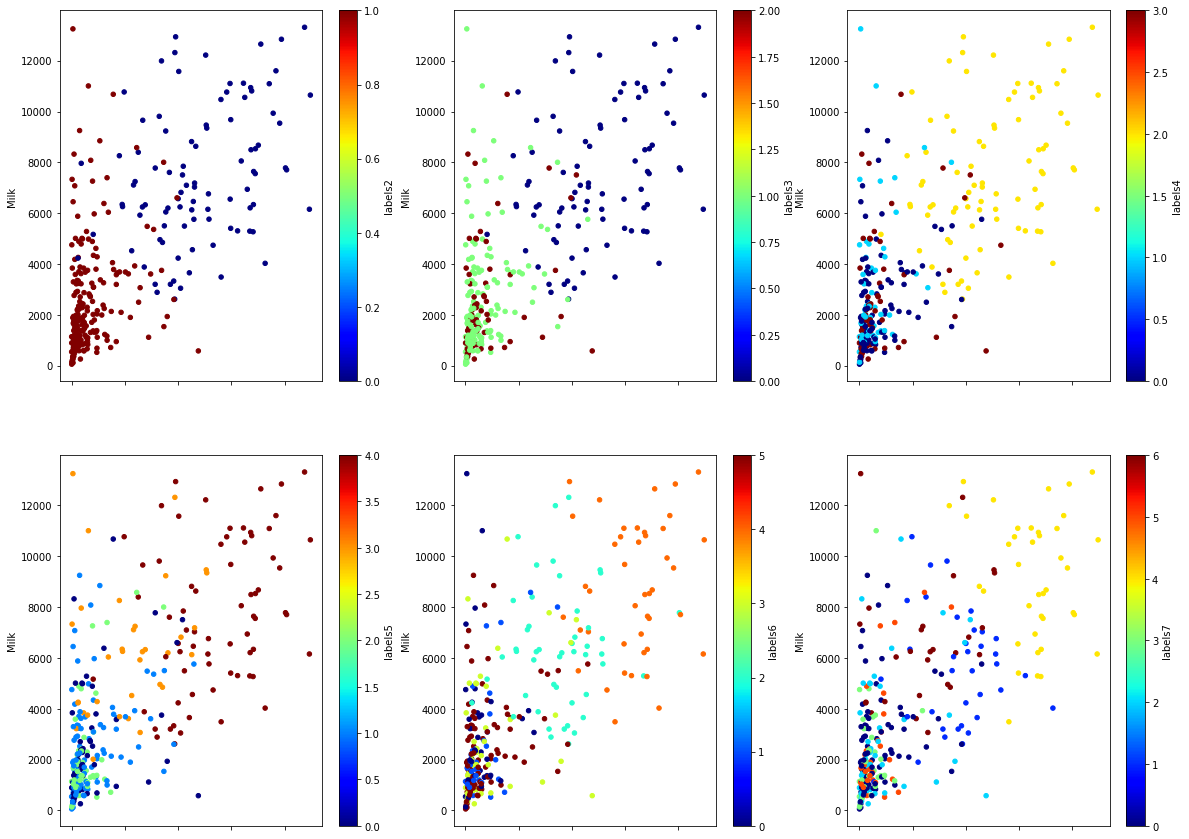

In [47]:
f, axes = plt.subplots(2, 3, figsize=(20, 15), sharex=True)
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels2',colormap='jet',ax=axes[0,0])
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels3',colormap='jet',ax=axes[0,1])
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels4',colormap='jet',ax=axes[0,2])
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels5',colormap='jet',ax=axes[1,0])
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels6',colormap='jet',ax=axes[1,1])
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels7',colormap='jet',ax=axes[1,2])

In [48]:
# Your code here
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data) 
    wcss.append(kmeans.inertia_)

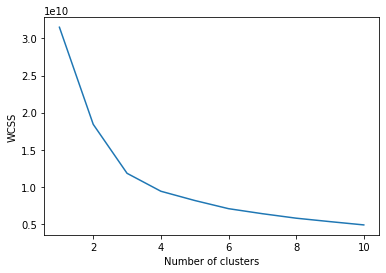

In [49]:
# Your comment here
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(data)

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(customers_scale)
y_kmeans = kmeans.predict(customers_scale)

In [52]:
y_kmeans

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [55]:
for x in np.arange(0.5, 1, 0.1):
    cluster = DBSCAN(eps=x)
    model = cluster.fit(customers_scale)
    data['labels_DBSCAN'+ str(x)]=model.labels_

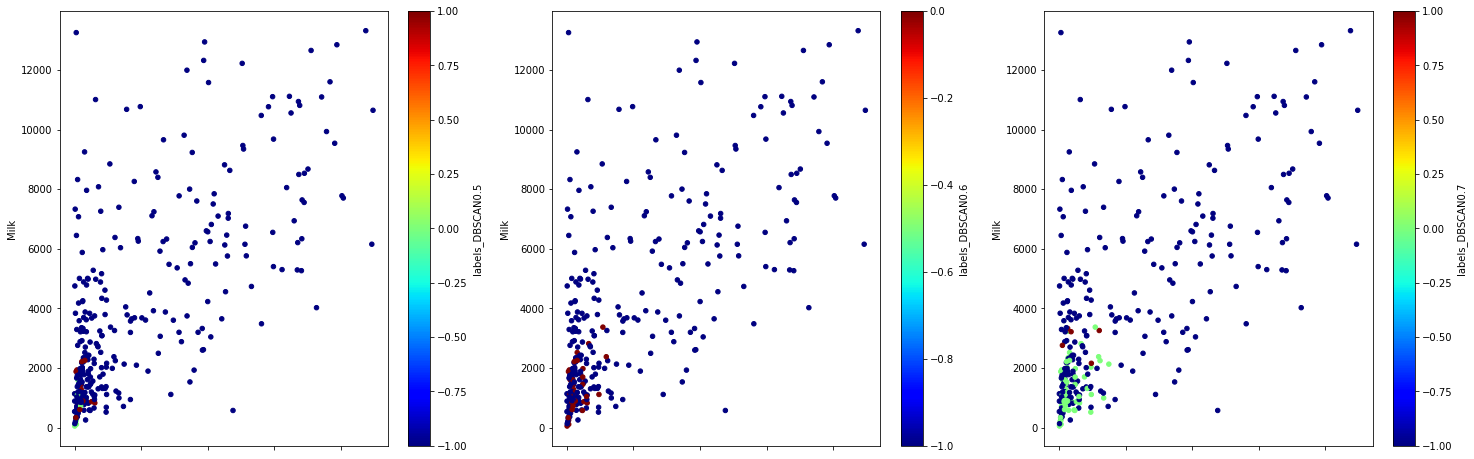

In [62]:
f, axes = plt.subplots(1, 3, figsize=(25, 8), sharex=True)
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels_DBSCAN0.5',colormap='jet',ax=axes[0])
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels_DBSCAN0.6',colormap='jet',ax=axes[1])
data.plot.scatter(x='Detergents_Paper',y='Milk',c='labels_DBSCAN0.7',colormap='jet',ax=axes[2])

In [63]:
# 0.5 is seems to be the more adequate value for the eps.